In [97]:
import numpy as np # линейная алгебра 
import pandas as pd # работа с датасетом 

#Визуализация
import matplotlib.pyplot as plt

#Машинное обучение
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#Система
import os
print(os.listdir("../input"))

['olivetti_faces_target.npy', 'olivetti_faces.npy']


In [98]:
import warnings #Отключение предупреждений для чистоты визуализации
warnings.filterwarnings('ignore')

In [99]:
data=np.load("../input/olivetti_faces.npy")
target=np.load("../input/olivetti_faces_target.npy")

Проверка приведённой информации:

In [100]:
print("В датасете {} изображений".format(len(data)))
print("В датасете {} уникальных людей".format(len(np.unique(target))))
print("Размер каждого изображения {}x{}".format(data.shape[1],data.shape[2]))

В датасете 400 изображений
В датасете 40 уникальных людей
Размер каждого изображения 64x64


In [101]:
print("Номера уникальных людей:",np.unique(target))

Номера уникальных людей: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]



<a class="anchor" id="2.1."></a>**3.1. Демонстрация 40 разных людей в датасете** 

In [102]:
def show_40_distinct_people(images, unique_ids):
    #Создание 4X10 сабплотов в  18x9 размере
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #Для удобства выполнения итераций.
    axarr=axarr.flatten()
    
    #Перебор идентификаторов пользователей
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("В наборе данных есть 40 разных людей")

<a class="anchor" id="2.2.">


<a  class="anchor" id="2.2."></a>**3.2. Покажем 10 изображений лица выбранного человека** 

In [104]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# у каждого объекта есть 10 различных изображений лица
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    


<a class="anchor" id="3."></a>**4. Модель машинного обучения для распознавания лиц**

Модели машинного обучения могут работать с векторами. 
Поскольку данные изображения представлены в матричной форме, их необходимо преобразовать в векторную.

In [106]:
#Изменение формы изображений для модели машинного обучения
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X:",X.shape)

X: (400, 4096)



<a class="anchor" id="3.1."></a>**4.1. Разделение данных и таргет на случайные обучающие и тестовые подмножества** 

Набор данных содержит по 10 изображений лиц для каждого испытуемого. 70% изображений лиц будут использованы для обучения, а 30% - для тестирования. Используется функция стратификации, позволяющая получить равное количество обучающих и тестовых изображений для каждого испытуемого. Таким образом, для каждого предмета будет 7 обучающих изображений и 3 тестовых. Вы можете играть с показателями обучения и тестирования.

In [107]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X:",X_train.shape)
print("y:{}".format(y_train.shape))

X: (280, 4096)
y:(280,)



<a class="anchor" id="3.2."></a>**4.2.Анализ основных компонентов**


In [109]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)


<a class="anchor" id="3.4."></a>**4.3. Нахождение оптимального количества основных компонентов**

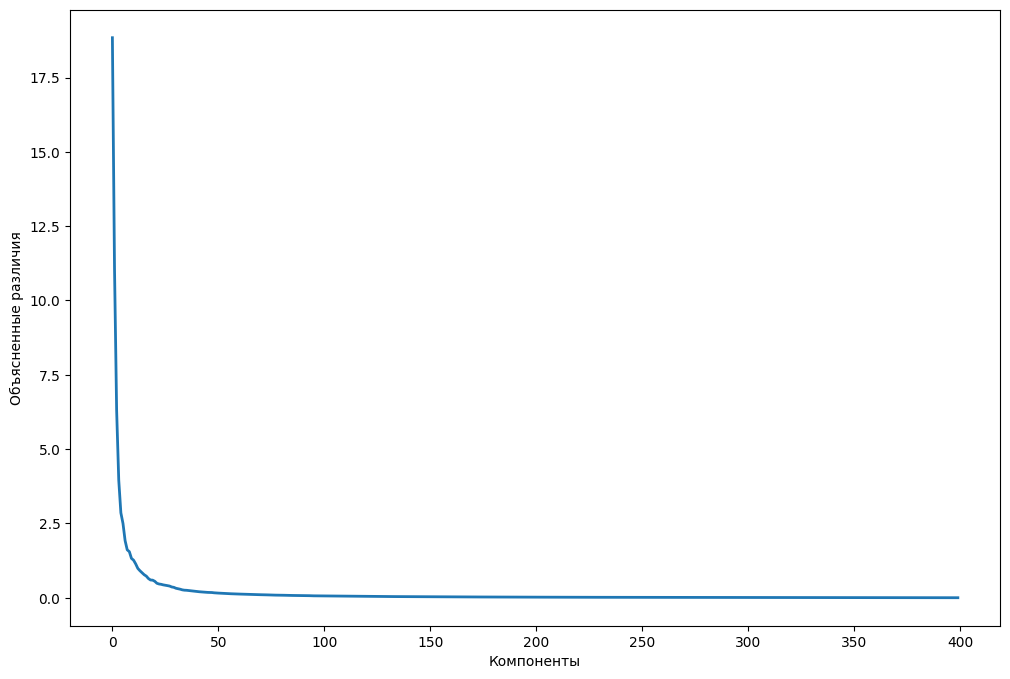

In [111]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Компоненты')
plt.ylabel('Объясненные различия')
plt.show()

На рисунке выше видно, что 90 и более компонентов PCA представляют одни и те же данные. Теперь давайте проведем классификацию, используя 90 компонентов PCA.

In [112]:
n_components=90

In [113]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)


<a class="anchor" id="3.5."></a>**4.4. Показать "среднее" лицо**  


<a class="anchor" id="3.5e1."></a>**4.5. Демонстрация собственных параметров (выделяющиеся черты)** 


<a class="anchor" id="3.6."></a>**4.6. Результаты классификации**  

In [116]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [117]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("точность:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

точность:0.93


In [119]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    


<a class="anchor" id="3.7."></a>**4.7. Дополнительные результаты** 


In [120]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, y_train)

    y_pred=clf.predict(X_test_pca)
    print(10*"=","{} LDA результат".format(name).upper(),10*"=")
    print("Точность:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

========== LDA LDA РЕЗУЛЬТАТ ==========
Точность:0.93

========== LR LDA РЕЗУЛЬТАТ ==========
Точность:0.93

========== NB LDA РЕЗУЛЬТАТ ==========
Точность:0.88

========== KNN LDA РЕЗУЛЬТАТ ==========
Точность:0.72

========== DT LDA РЕЗУЛЬТАТ ==========
Точность:0.62

========== SVM LDA РЕЗУЛЬТАТ ==========
Точность:0.93



Согласно приведенным выше результатам, линейный дискриминантный анализ и логистическая регрессия, по-видимому, демонстрируют наилучшие результаты.


<a class="anchor" id="3.8."></a>**4.8. Подтвержденные результаты**  

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} Средний балл кроссов:{:.2f}".format(name, cv_scores.mean()))

LDA Средний балл кроссов:0.98
LR Средний балл кроссов:0.94
NB Средний балл кроссов:0.78
KNN Средний балл кроссов:0.70
DT Средний балл кроссов:0.51
SVM Средний балл кроссов:0.86


Согласно результатам перекрестной проверки, линейный дискриминантный анализ и логистическая регрессия по-прежнему демонстрируют наилучшие результаты


In [122]:
lr=LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Точность:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Точность:0.93


In [124]:
print("Результаты классификации:\n{}".format(metrics.classification_report(y_test, y_pred)))

Результаты классификации:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
 


<a class="anchor" id="3.9."></a>**4.9. Более подтвержденные результаты: Leave One Out без дополнительной проверки** 

Набор данных Olivetti содержит по 10 изображений лиц для каждого человека. Это небольшое количество для обучения и тестирования моделей машинного обучения. Существует рекомендуемый метод перекрестной проверки для лучшей оценки моделей машинного обучения, в которых имеется несколько примеров классов. При использовании подхода LOO для тестирования используется только одна выборка из класса. Остальные используются для обучения. Эта процедура повторяется до тех пор, пока каждая выборка не будет использована для тестирования.

In [125]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out перекрестная проверка средняя оценка точности:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.94


In [126]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LinearDiscriminantAnalysis()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out перекрестная проверка средняя оценка точности:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out перекрестная проверка средняя оценка точности:0.98



<a class="anchor" id="3.10."></a>**4.10. Настройка гиперпараметров: GridSearcCV** 

Мы можем использовать GridSearchCV для улучшения производительности обобщения модели. Для этого настроим гиперпараметры классификатора логистической регрессии.

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
lr=LogisticRegression(C=1.0, penalty="l2")
lr.fit(X_train_pca, y_train)
print("lr счёт:{:.2f}".format(lr.score(X_test_pca, y_test)))

lr счёт:0.93


In [129]:
print("Точность:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Результаты классификации:\n{}".format(metrics.classification_report(y_test, y_pred)))

Точность:0.93
Результаты классификации:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.


<a class="anchor" id="6."></a>**5. Автоматизированный рабочий процесс машинного обучения: конвейер** 

Применение машинного обучения к наборам данных имеет стандартный рабочий процесс. Sklearn предлагает объект Pipeline для автоматизации этого рабочего процесса. Pipeline позволяет выполнять стандартные рабочие процессы для выполнения операций машинного обучения, таких как масштабирование, извлечение объектов и моделирование. Конвейер гарантирует одинаковую работу со всем набором данных, обеспечивая согласованность обучающих и тестовых данных.

In [130]:
from sklearn.pipeline import Pipeline

In [131]:
print("Точность:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Результаты классификации:\n{}".format(metrics.classification_report(y_test, y_pred)))

Точность:0.93
Результаты классификации:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.